검색 키워드 입력 : hmm
날짜 입력 : 2022.03.03
날짜 입력 : 2022.03.05


:압정: 스크롤 완료 (더 이상 내려갈 곳 없음)

HMM도 러시아 노선 보이콧 합류할까…운항 중단 검토
'물류 차질'에…HMM 14%↑1년만에 최대폭
[특징주] 물류난 심화 우려에 해운주 강세…HMM 14% 급등
[우크라 사태] HMM, 러 극동노선 운항 중단 검토
[특징주] 對러 제재에 물류난 우려 속 HMM 11% 급등
[ET라씨로] HMM, 러시아 노선 운항중단 검토...13%대↑급등
HMM, 주가 14% 상승…민영화 계획은 어떻게 될까?
[증시 돋보기] 기관투자자, HMM 삼성엔지니어링 팬오션 많이 담아
글로벌 물류대란 지속…해상운임 상승에 HMM, 14.19%↑
[특징주] HMM, 글로벌 공급망 차질에 '급등'
글로벌 물류대란 지속…해상운임 상승에 HMM, 14.19%↑
[특징주] HMM, 글로벌 공급망 차질에 '급등'
HMM, 러시아로 배 안 띄우나…러 가상자산 거래도 막는다
HMM, 이번 주 코스피 외국인 순매수 TOP1…POSCO·SK하이닉스·한화에어로...
[동영상] HMM, 물류난 심화 우려에 주가 급등
“HMM, 병목현상 수혜는 당분간 지속될 듯”
[특징주] HMM, 해상운임 상승 기대감에… 19%↑
"對러 제재로 물류대란 악화"…HMM, 14%↑
[여의도 주식왕 2부] '엠에스씨 vs 포스코강판 vs HMM' 여의도를 달굴 종...
[급등주] HMM 6% 상승 '해상운임 변동성 높아져'
HMM 주가 2%↑...문성혁 장관 발언 때문?
코스피 운수창고, 1분기 영업익 전년 동기 대비 156% 급증 전망… 대한항...
HMM 러시아 우크라이나 전쟁 영향 미미, 물류대란에 실적 기대 '솔솔'
[어제의 특징주] HMM, 러 노선 운항 중단 검토에 '강세'…한탑, 투자주의...
고려해운·HMM·한국머스크, 인천항 선정 선박저속운항 우수선사
HMM, 주가 훈풍…"민영화는 '아직'"
HMM, 배재훈 이어 김경배 카드 통할까?
[마감] "러시아군, 자포리자 원전 단지 장악"에 증시 하락세...HMM, '급등...
[4일 상한가 총정리] 효성오앤비·조비

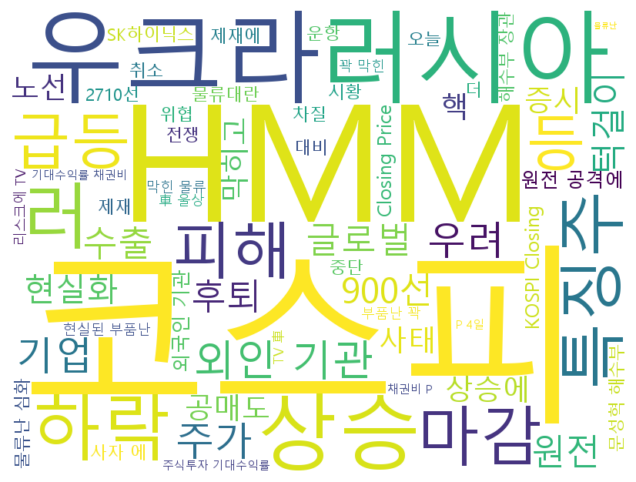

In [7]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

driver = wb.Chrome()
driver.maximize_window()
keyword = input("검색 키워드 입력 :")
start = input('날짜 입력 :')
finish= input('날짜 입력 :')
driver.get(f'https://search.naver.com/search.naver?ssc=tab.news.all&query={keyword}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={start}&de={finish}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20211127to20251127&is_sug_officeid=0&office_category=0&service_area=0')
time.sleep(2)
body = driver.find_element(By.TAG_NAME, 'body')

# 스크롤 반복
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    body.send_keys(Keys.END)
    time.sleep(1)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        print(":압정: 스크롤 완료 (더 이상 내려갈 곳 없음)")
        break
    last_height = new_height
news = driver.find_elements(By.CSS_SELECTOR, 'span.sds-comps-text.sds-comps-text-ellipsis.sds-comps-text-ellipsis-1.sds-comps-text-type-headline1')
print()
for i in news :
    print(i.text)

# 크롤링한 뉴스 제목 리스트
titles = [i.text for i in news]
text = " ".join(titles)
words = text.split()                       # 공백 기준으로 단어 나누기
counter = Counter(words)
min_freq = 3 # ← 등장 횟수 최소 기준 (3회 미만 단어 제거)

# -------------------------------
# 2) 빈도 기준 이하 단어 제거
# -------------------------------
filtered_words = [word for word in words if counter[word] >= min_freq]
filtered_text = " ".join(filtered_words)

# WordCloud 생성
wc = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # ← 한글 폰트 경로
    background_color="white",
    width=800,
    height=600
    ).generate(filtered_text)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()